# Get Data For Today

## Checks the weather for the next few and last few open hours using weather site api and makes predictions off of it using the past data given through "advanced welcome table Summed"



In [3]:
import json
import urllib
import datetime
import pandas as pd
i = datetime.datetime.now()
from datetime import datetime, timedelta

#N = 2
day_list = [-7,-5,-3,-1,0,2,4,6,7]
prediction_list = []
date_array = []
for N in day_list:
    i = datetime.now() - timedelta(days=N)

    #print datetime.now()
    #print date_N_days_ago
    #print i

    date = i.isoformat()
    #print date
    date =  date[:19]
    print date

    todays_weather_site = "https://api.darksky.net/forecast/6ee0b0521cccd43b16a44a63eba7cd8d/40.6987,-73.9859," + date

    todays_weather_data  = json.load(urllib.urlopen(todays_weather_site))

    #print todays_weather_data['daily']['data']

    summed_by_date = pd.read_csv('advanced_welcome_table_summed.csv')
    #print summed_by_date

    #print summed_by_date
    year_dummies = pd.get_dummies(summed_by_date.year, prefix ='year').iloc[:,1:]
    year_summed_by_date = pd.concat([summed_by_date, year_dummies], axis=1)
    day_dummies = pd.get_dummies(year_summed_by_date.day, prefix='day').iloc[:,1:]
    day_summed_by_date = pd.concat([year_summed_by_date, day_dummies], axis=1)
    #print day_summed_by_date.head()

    month_dummies = pd.get_dummies(day_summed_by_date.month, prefix ='month').iloc[:,1:]
    dummy_summed_by_date = pd.concat([day_summed_by_date, month_dummies], axis=1)

    #print list(dummy_summed_by_date)
    #list(dummy_summed_by_date)

    full_cols = ['total_visitors','Temperature','year_2016','year_2017','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','day_1','day_2','day_3','day_4','day_5','day_6','precipitation','cloud_cover','snow','rain']
    feature_cols = ['Temperature','year_2016','year_2017','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','day_1','day_2','day_3','day_4','day_5','day_6','precipitation','cloud_cover','snow','rain']
    dummy_summed_by_date = dummy_summed_by_date[full_cols].dropna() 
    X = dummy_summed_by_date[feature_cols]
    y = dummy_summed_by_date['total_visitors']

    # instantiate, fit
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    lm.fit(X, y)
    #print date
    t = todays_weather_data['daily']['data'][0]
    temp = t['temperatureMax']
    month = i.month
    day =  i.weekday()
    year = i.year
    precip = t['precipIntensity']
    cloud = t['cloudCover']
    try:
        if t['precipType'] == "rain":
            rain = 1
            snow = 0 
        elif t['precipType'] == 'snow':
            rain = 0
            snow = 1
        else:
            rain = 0
            snow = 0
    except:
        rain = 0 
        snow = 0
    #print len(feature_cols)
    days_array = [0]*24
    days_array[0] =  temp
    if year > 2015:
        days_array[year -2015] = 1
    if month > 1:
        days_array[month+1] = 1
    if day > 0:
        days_array[day+13] =1
    days_array[20] = precip
    days_array[21] = cloud
    days_array[22] = snow
    days_array[23] = rain
    print days_array
    prediction_list.append(days_array)
    date_array.append(date)
    #print lm.predict(days_array)
    
    #lm.predict()
    #print lm.intercept_
    #print lm.coef_
    # print coefficients
    #print "stuff", zip(feature_cols, lm.coef_)
    #print "cat",lm.predict([43, 0,0, 0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])
    #lm.score(X, y)

    #array_of_days = []
    #day_array = [0,2,4,6,7]

    print "temp,years,months,days,precip, cloud, snow, rain"

    #from sklearn.neural_network import MLPRegressor

    #clf = MLPRegressor(hidden_layer_sizes=(10,))

    #clf.fit(X, y)

    #print clf.predict(today_array)







2017-05-06T13:56:16
[62.05, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.0038, 0.66, 0, 1]
temp,years,months,days,precip, cloud, snow, rain
2017-05-04T13:56:16
[60.63, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.005, 0.58, 0, 1]
temp,years,months,days,precip, cloud, snow, rain
2017-05-02T13:56:16
[71.24, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.0078, 0.34, 0, 1]
temp,years,months,days,precip, cloud, snow, rain
2017-04-30T13:56:17
[62.35, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.0005, 0.75, 0, 1]
temp,years,months,days,precip, cloud, snow, rain
2017-04-29T13:56:17
[80.17, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.0152, 0.5, 0, 1]
temp,years,months,days,precip, cloud, snow, rain
2017-04-27T13:56:17
[67.21, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.0013, 0.73, 0, 1]
temp,years,months,days,precip, cloud, snow, rain
2017-04-25T13:56:17
[55.96, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [2]:
    print prediction_list
    print X

[[62.05, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.0038, 0.66, 0, 1], [60.62, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.005, 0.58, 0, 1], [71.24, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.0078, 0.34, 0, 1], [62.35, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.0005, 0.75, 0, 1], [80.55, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.0152, 0.44, 0, 1], [67.21, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.0013, 0.73, 0, 1], [55.96, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.0407, 0.83, 0, 1], [61.59, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.49, 0, 0], [57.42, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.0086, 0.9, 0, 1]]
     Temperature  year_2016  year_2017  month_2  month_3  month_4  month_5  \
0          82.07        0.0        0.0      0.0      0.0      0.0      0.0   
1          82.16        0.0        0.0      0.0      0.0      0.0      0.0  

In [4]:
count = 0
for predict_day in prediction_list:
    print date_array[count]
    print predict_day
    print lm.predict(predict_day)
    count += 1

2017-05-06T13:56:16
[62.05, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.0038, 0.66, 0, 1]
[ 61.32217879]
2017-05-04T13:56:16
[60.63, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.005, 0.58, 0, 1]
[ 8.55929936]
2017-05-02T13:56:16
[71.24, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.0078, 0.34, 0, 1]
[ 18.14181237]
2017-04-30T13:56:17
[62.35, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.0005, 0.75, 0, 1]
[ 97.7918139]
2017-04-29T13:56:17
[80.17, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.0152, 0.5, 0, 1]
[ 109.44628422]
2017-04-27T13:56:17
[67.21, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.0013, 0.73, 0, 1]
[ 44.93080229]
2017-04-25T13:56:17
[55.96, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.0407, 0.83, 0, 1]
[ 33.30474012]
2017-04-23T13:56:17
[61.59, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.49, 0, 0]
[ 104.19899299]
2017-04-22T13:56:17
[57.42, 0, 1, 0, 0, 1, 0, 0

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

In [27]:
from sklearn import cross_validation
ctrain, ctest, ztrain, ztest = cross_validation.train_test_split(X, y)
print cross_validation.cross_val_score(lm, X, y, cv=4)
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()

[ 0.4208339   0.35340798  0.38029144  0.32434809]


In [5]:
print cross_validation.cross_val_score(clf, X, y, cv=4)

[ 0.26457711  0.31624629  0.44869194 -0.03315931]


In [5]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
clf = DecisionTreeRegressor()
clf.fit(ctrain, ztrain)
zpred = clf.predict(ctest)

In [8]:
# we'll explore results for max_depth from 1 to 20
max_depth_array = np.arange(1, 21)
train_error = np.zeros(len(max_depth_array))
test_error = np.zeros(len(max_depth_array))

In [9]:
for i, max_depth in enumerate(max_depth_array):
    clf = DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(ctrain, ztrain)

    ztrain_pred = clf.predict(ctrain)
    ztest_pred = clf.predict(ctest)

    train_error[i] = np.sqrt(np.mean((ztrain_pred - ztrain) ** 2))
    test_error[i] = np.sqrt(np.mean((ztest_pred - ztest) ** 2))

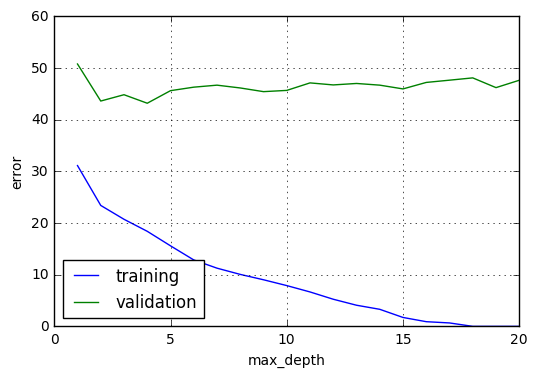

In [10]:
plt.plot(max_depth_array, train_error, label='training')
plt.plot(max_depth_array, test_error, label='validation')
plt.grid()
plt.legend(loc=3)
plt.xlabel('max_depth')
plt.ylabel('error')

In [11]:
from sklearn.grid_search import GridSearchCV
clf = DecisionTreeRegressor()
grid = GridSearchCV(clf, param_grid=dict(max_depth=max_depth_array))
grid.fit(X, y)
print grid.best_params_

C:\Program Files\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_depth': 2}


In [28]:
clf = DecisionTreeRegressor(max_depth=2)
clf.fit(ctrain, ztrain)
zpred = clf.predict(ctest)
print cross_validation.cross_val_score(clf, X, y, cv=4)
count = 0
for predict_day in prediction_list:
    print date_array[count]
    print predict_day
    print clf.predict(predict_day)
    count += 1

[ 0.49480427  0.33575844  0.45970949  0.0316985 ]
2017-02-25T15:28:21
[51.66, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.007, 0.72, 0, 1]
[ 80.25]
2017-02-23T15:28:38
[52.56, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.68, 0, 0]
[ 29.86363636]
2017-02-21T15:28:39
[42.39, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.0037, 0.61, 0, 1]
[ 29.6]
2017-02-19T15:28:39
[55.78, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.38, 0, 0]
[ 80.25]
2017-02-18T15:28:39
[58.15, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.15, 0, 0]
[ 80.25]
2017-02-16T15:28:39
[36.01, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.37, 0, 0]
[ 29.86363636]
2017-02-14T15:28:40
[38.52, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.3, 0, 0]
[ 29.6]
2017-02-12T15:28:40
[36.97, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.0164, 0.71, 1, 0]
[ 80.25]
2017-02-11T15:28:40
[43.18, 0, 1, 1, 0, 0, 0, 0, 0, 0, 

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

In [13]:
plt.scatter(ztrain)
plt.scatter(zpred)

TypeError: scatter() takes at least 2 arguments (1 given)

In [14]:
def outlier_fraction(y_pred, y_true, cutoff=20):
    return np.sum((abs(y_pred - y_true) > cutoff)) * 1. / len(y_pred)

In [15]:
train_outfrac = np.zeros(len(max_depth_array))
test_outfrac = np.zeros(len(max_depth_array))

for i, max_depth in enumerate(max_depth_array):
    clf = DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(ctrain, ztrain)

    ztrain_pred = clf.predict(ctrain)
    ztest_pred = clf.predict(ctest)

    train_outfrac[i] = outlier_fraction(ztrain_pred, ztrain)
    test_outfrac[i] = outlier_fraction(ztest_pred, ztest)

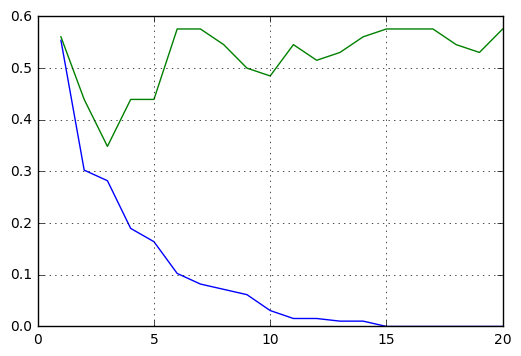

In [16]:
plt.plot(max_depth_array, train_outfrac)
plt.plot(max_depth_array, test_outfrac)
plt.grid()

In [17]:
clf = DecisionTreeRegressor(max_depth=20)
clf.fit(ctrain, ztrain)
zpred = clf.predict(ctest)
print cross_validation.cross_val_score(clf, X, y, cv=4)

[ 0.28755147  0.28260616  0.32421833 -0.29793802]


In [18]:
from sklearn.ensemble import AdaBoostRegressor

In [19]:
#ctrain, ctest, ztrain, ztest = cross_validation.train_test_split(X, y)
lm = AdaBoostRegressor()
lm.fit(X, y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [20]:
count = 0
for predict_day in prediction_list:
    print date_array[count]
    print predict_day
    print lm.predict(predict_day)
    count +=1

2017-02-25T15:28:21
[51.66, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.007, 0.72, 0, 1]
[ 79.375]
2017-02-23T15:28:38
[52.56, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.68, 0, 0]
[ 54.53333333]
2017-02-21T15:28:39
[42.39, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.0037, 0.61, 0, 1]
[ 21.60416667]
2017-02-19T15:28:39
[55.78, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.38, 0, 0]
[ 109.16666667]
2017-02-18T15:28:39
[58.15, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.15, 0, 0]
[ 102.33333333]
2017-02-16T15:28:39
[36.01, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.37, 0, 0]
[ 52.72857143]
2017-02-14T15:28:40
[38.52, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.3, 0, 0]
[ 36.66071429]
2017-02-12T15:28:40
[36.97, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.0164, 0.71, 1, 0]
[ 53.47368421]
2017-02-11T15:28:40
[43.18, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

In [25]:
print cross_validation.cross_val_score(clf, X, y, cv=4)

[ 0.24656979  0.28635385  0.41477588 -0.44830283]


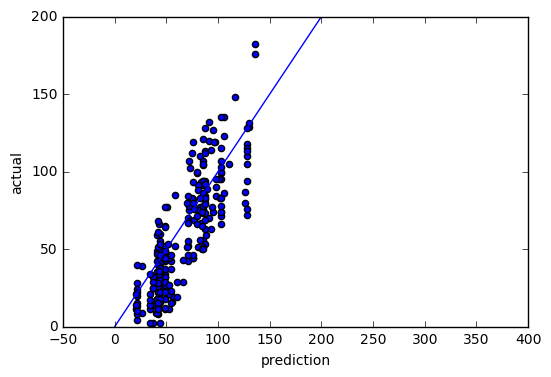

In [26]:
plt.scatter(lm.predict(X),y)
plt.plot([0,370], [0,370])
plt.ylim(0,200)
plt.xlabel('prediction')
plt.ylabel('actual')

In [7]:
dates = pd.to_datetime(summed_by_date[summed_by_date.columns[0]])

(-0.2, 1.2)

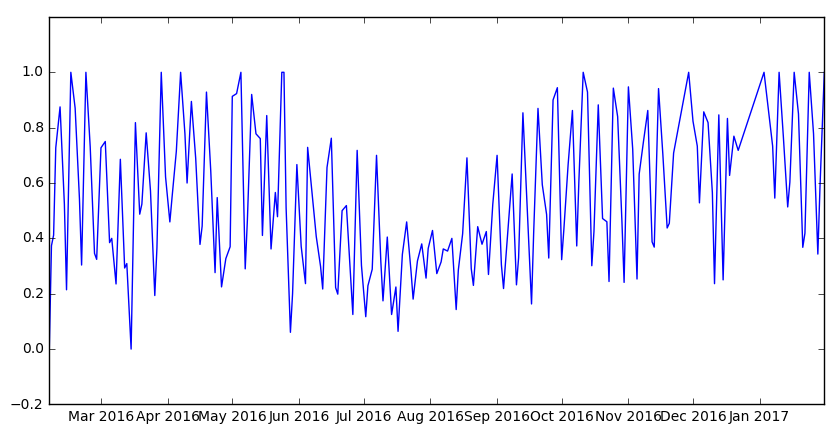

In [10]:
plt.figure(figsize=(10,5))
plt.plot_date(dates, summed_by_date['ratio_11201'], "b-")
plt.ylim(-0.2,1.2)